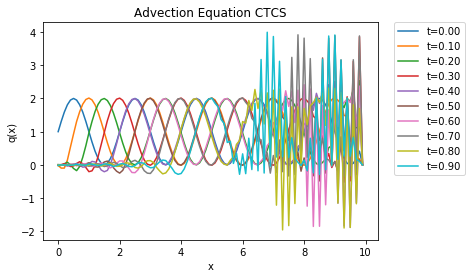

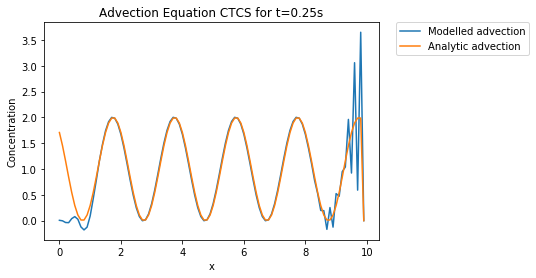

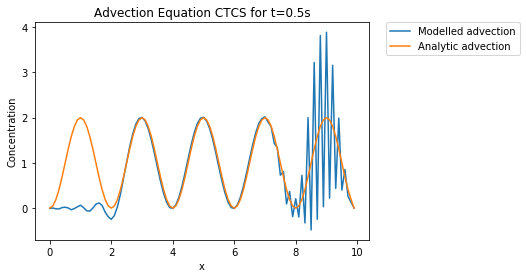

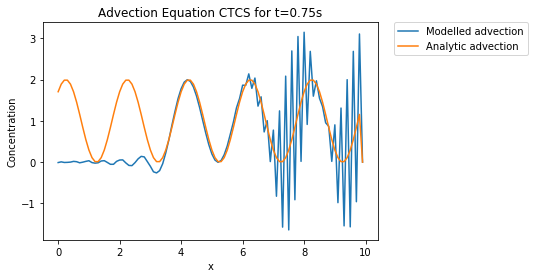

|   Time |   L1 error |   L2 error |
|--------+------------+------------|
|  0.250 |      0.166 |      0.320 |
|  0.500 |      0.449 |      0.636 |
|  0.750 |      0.759 |      0.866 |


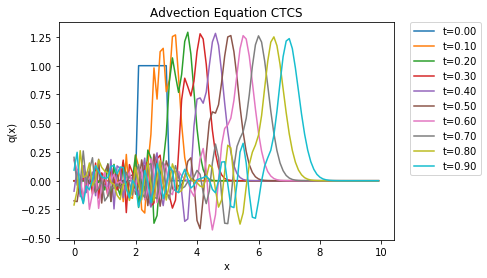

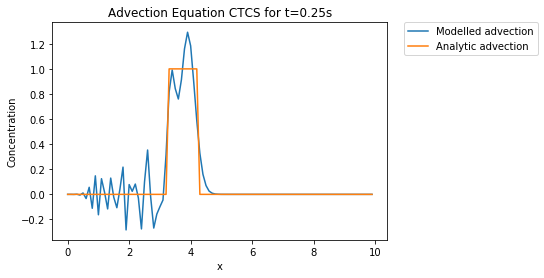

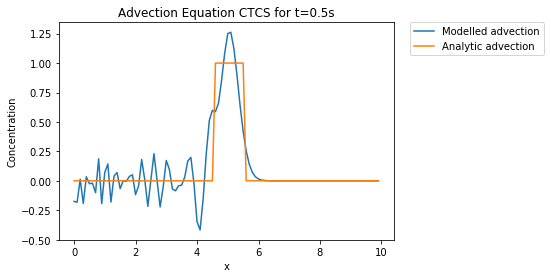

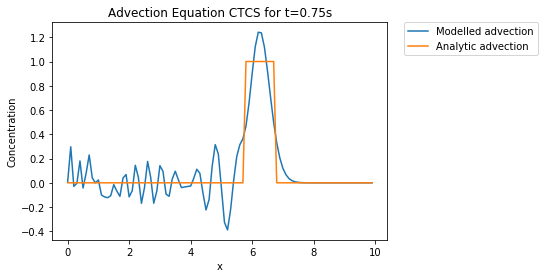

|   Time |   L1 error |   L2 error |
|--------+------------+------------|
|  0.250 |      0.587 |      0.357 |
|  0.500 |      0.923 |      0.510 |
|  0.750 |      1.005 |      0.488 |


In [149]:
##Import necessary modules.
import numpy as np
from numpy import sin
from tabulate import tabulate
import matplotlib.pyplot as plt
#Create function to call in initial values for q and elements for Courant number.
#n is number of data points in space, with diffx being the distance between these values.
#m is number of data points in time, with difft being the time interval between these values.
#windspeed is considered as constant in this model.
#in_cond allows the person calling the function to specify what initial data to use.
def drwCTCS(n,m,diffx,difft,windspeed,in_cond):
#Generate x values for graph.
    x=np.arange(0,diffx*(n),diffx)
#Apply the initial function to the values of x at t=0.
    initial_array=in_cond(x)
#Calculate Courant number.
    c=difft*windspeed/diffx
#Set up array of zeros to fill.
    q=np.zeros((m,n))
#Place the initial conditions in the top row of the array.
    for i in range (0,n-1):
        q[0][i]=initial_array[i]
    q=np.zeros((m,n))
#Generate data based on FTCS scheme for row 1, but CTCS for rest of data.
    for i in range (0,n-1):
        q[0][i]=initial_array[i]
        q[1][0]=-c/2*(q[0][1]-q[0][n-1])+q[0][0]
    for k in range (1,n-1):
        q[1][k]=-c/2*(q[0][k+1]-q[0][k-1])+q[0][k] 
    for h in range (2,m):
        q[h][0]=c*(q[h-1][n-1]-q[h-1][1])+q[h-2][0]
        for j in range (1,n-1):
            q[h][j]=c*(q[h-1][j-1]-q[h-1][j+1])+q[h-2][j]
#Plot model.
    for w in range (0,int(m/10)):
        plt.plot(x,q[10*w],label='t='+("%.2f"%(10*w*difft)))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('q(x)')
    plt.title('Advection Equation CTCS')
    plt.show()

#Generate matrix of analytical results.
    Q=np.zeros((m,n))
    for i in range (0,n-1):
        Q[0][i]=initial_array[i]
    for h in range(1,m-1):
        for j in range(0,n-1):
            Q[h][j]=in_cond(diffx*j-windspeed*difft*h)  
#Plot graph to compare analytic and modelled results for quartile 1:
    Quartile_1=int(m/4)
    plt.plot(x,q[Quartile_1],label="Modelled advection")
    plt.plot(x,Q[Quartile_1],label="Analytic advection")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('Concentration')
    plt.title('Advection Equation CTCS for t='+str(Quartile_1*difft)+'s')
    plt.show()
#Plot graph to compare analytic and modelled results for quartile 2:
    Quartile_2=int(m/2)
    plt.plot(x,q[Quartile_2],label="Modelled advection")
    plt.plot(x,Q[Quartile_2],label="Analytic advection")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('Concentration')
    plt.title('Advection Equation CTCS for t='+str(Quartile_2*difft)+'s')
    plt.show()
#Plot graph to compare analytic and modelled results for quartile 3:
    Quartile_3=int(3*m/4)
    plt.plot(x,q[Quartile_3],label="Modelled advection")
    plt.plot(x,Q[Quartile_3],label="Analytic advection")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('Concentration')
    plt.title('Advection Equation CTCS for t='+str(Quartile_3*difft)+'s')
    plt.show()
#Set up error arrays.
    E1=np.array([abs(q[Quartile_1]-Q[Quartile_1])])
    E2=np.array([abs(q[Quartile_2]-Q[Quartile_2])])
    E3=np.array([abs(q[Quartile_3]-Q[Quartile_3])])
#Find L1 error norm using each node at these three times.
    L1_error_Q1=np.sum(E1*diffx)/np.sum(Q[Quartile_1]*diffx)
    L1_error_Q2=np.sum(E2*diffx)/np.sum(Q[Quartile_2]*diffx)
    L1_error_Q3=np.sum(E3*diffx)/np.sum(Q[Quartile_3]*diffx)
    L1_error=[(L1_error_Q1).round(3),(L1_error_Q2).round(3),(L1_error_Q3).round(3)]
#Find root mean square error at each node at these three times.
    L2_error_Q1=(np.sqrt(np.sum(E1**2*diffx)))/(np.sqrt(np.sum(Q[Quartile_1]**2*diffx)))
    L2_error_Q2=(np.sqrt(np.sum(E2**2*diffx)))/(np.sqrt(np.sum(Q[Quartile_2]**2*diffx)))
    L2_error_Q3=(np.sqrt(np.sum(E3**2*diffx)))/(np.sqrt(np.sum(Q[Quartile_3]**2*diffx)))   
    L2_error=[(L2_error_Q1).round(3),(L2_error_Q2).round(3),(L2_error_Q3).round(3)]
#Output these as a table. 
    time=[Quartile_1*difft,Quartile_2*difft,Quartile_3*difft]
    table=zip(time,L1_error,L2_error)
    print(tabulate(table, headers=["Time", "L1 error", "L2 error"],floatfmt=".3f",tablefmt='orgtbl'))
    return
drwCTCS(100,100,0.1,0.01,5,lambda x:(sin(np.pi*x)+1))
drwCTCS(100,100,0.1,0.01,5,lambda x: np.heaviside(-(x-3),1)-np.heaviside(-(x-2),1))

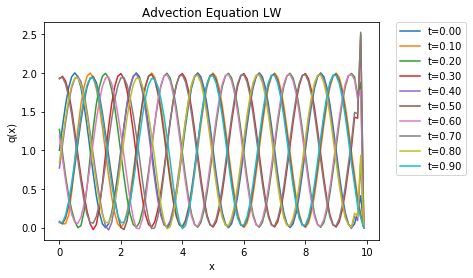

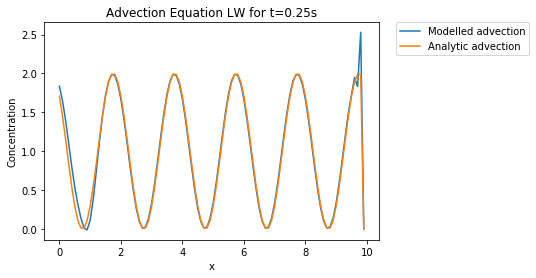

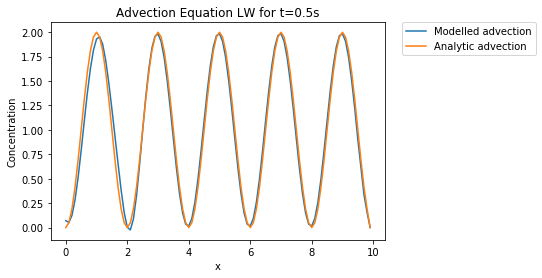

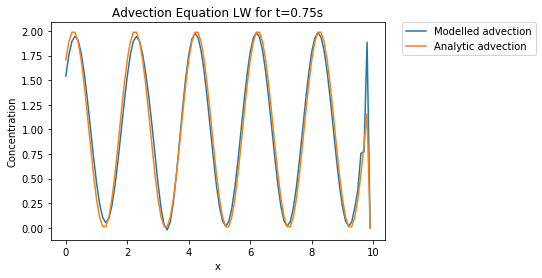

|   Time |   L1 error |   L2 error |
|--------+------------+------------|
|  0.250 |      0.056 |      0.077 |
|  0.500 |      0.075 |      0.076 |
|  0.750 |      0.100 |      0.106 |


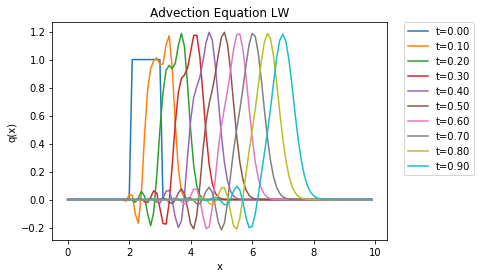

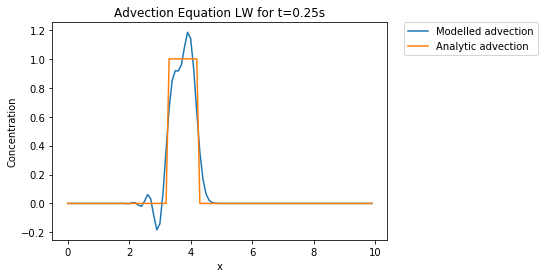

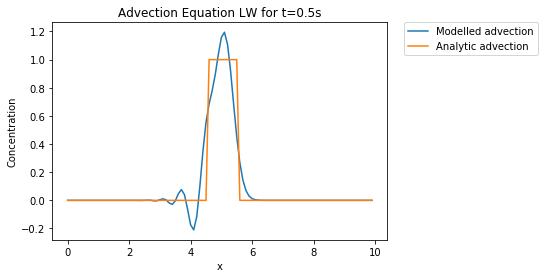

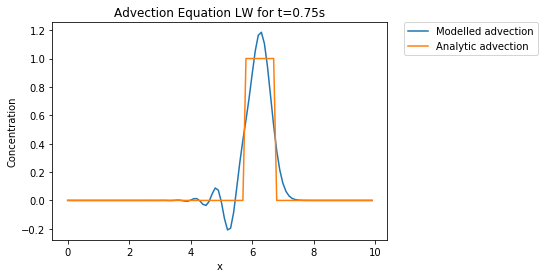

|   Time |   L1 error |   L2 error |
|--------+------------+------------|
|  0.250 |      0.316 |      0.269 |
|  0.500 |      0.443 |      0.359 |
|  0.750 |      0.466 |      0.349 |


In [148]:
#Import necessary modules.
import numpy as np
from numpy import sin
from tabulate import tabulate
import matplotlib.pyplot as plt
#Create function to call in initial values for q and elements for Courant number.
#n is number of data points in space, with diffx being the distance between these values.
#m is number of data points in time, with difft being the time interval between these values.
#windspeed is considered as constant in this model.
#in_cond allows the person calling the function to specify what initial data to use.
def drwLW(n,m,diffx,difft,windspeed,in_cond):
#Generate x values for graph.
    x=np.arange(0,diffx*(n),diffx)
#Apply the initial function to the values of x at t=0.
    initial_array=in_cond(x)
#Calculate Courant number.
    c=difft*windspeed/diffx
#Set up array of zeros to fill.
    q=np.zeros((m,n))
#Place the initial conditions in the top row of the array.
    for i in range (0,n-1):
        q[0][i]=initial_array[i]
#Generate data based on LW scheme, wrapping data round at the ends of the rows.
    for h in range (1,m-1):
        for j in range (1,n-1):
            q[h][0]=q[h-1][j]-c/2*(q[h-1][j+1]-q[h-1][n-1])+c**2/2*(q[h-1][j+1]-2*q[h-1][j]+q[h-1][n-1])
            q[h][j]=q[h-1][j]-c/2*(q[h-1][j+1]-q[h-1][j-1])+c**2/2*(q[h-1][j+1]-2*q[h-1][j]+q[h-1][j-1])

#Plot model.
    for w in range (0,int(m/10)):
        plt.plot(x,q[10*w],label='t='+("%.2f"%(10*w*difft)))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('q(x)')
    plt.title('Advection Equation LW')
    plt.show()

#Generate matrix of analytical results.
    Q=np.zeros((m,n))
    for i in range (0,n-1):
        Q[0][i]=initial_array[i]
    for h in range(1,m-1):
        for j in range(0,n-1):
            Q[h][j]=in_cond(diffx*j-windspeed*difft*h)  
#Plot graph to compare analytic and modelled results for quartile 1:
    Quartile_1=int(m/4)
    plt.plot(x,q[Quartile_1],label="Modelled advection")
    plt.plot(x,Q[Quartile_1],label="Analytic advection")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('Concentration')
    plt.title('Advection Equation LW for t='+str(Quartile_1*difft)+'s')
    plt.show()
#Plot graph to compare analytic and modelled results for quartile 2:
    Quartile_2=int(m/2)
    plt.plot(x,q[Quartile_2],label="Modelled advection")
    plt.plot(x,Q[Quartile_2],label="Analytic advection")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('Concentration')
    plt.title('Advection Equation LW for t='+str(Quartile_2*difft)+'s')
    plt.show()
#Plot graph to compare analytic and modelled results for quartile 3:
    Quartile_3=int(3*m/4)
    plt.plot(x,q[Quartile_3],label="Modelled advection")
    plt.plot(x,Q[Quartile_3],label="Analytic advection")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('Concentration')
    plt.title('Advection Equation LW for t='+str(Quartile_3*difft)+'s')
    plt.show()
#Set up error arrays.
    E1=np.array([abs(q[Quartile_1]-Q[Quartile_1])])
    E2=np.array([abs(q[Quartile_2]-Q[Quartile_2])])
    E3=np.array([abs(q[Quartile_3]-Q[Quartile_3])])
#Find L1 error norm using each node at these three times.
    L1_error_Q1=np.sum(E1*diffx)/np.sum(Q[Quartile_1]*diffx)
    L1_error_Q2=np.sum(E2*diffx)/np.sum(Q[Quartile_2]*diffx)
    L1_error_Q3=np.sum(E3*diffx)/np.sum(Q[Quartile_3]*diffx)
    L1_error=[(L1_error_Q1).round(3),(L1_error_Q2).round(3),(L1_error_Q3).round(3)]
#Find root mean square error at each node at these three times.
    L2_error_Q1=(np.sqrt(np.sum(E1**2*diffx)))/(np.sqrt(np.sum(Q[Quartile_1]**2*diffx)))
    L2_error_Q2=(np.sqrt(np.sum(E2**2*diffx)))/(np.sqrt(np.sum(Q[Quartile_2]**2*diffx)))
    L2_error_Q3=(np.sqrt(np.sum(E3**2*diffx)))/(np.sqrt(np.sum(Q[Quartile_3]**2*diffx)))   
    L2_error=[(L2_error_Q1),(L2_error_Q2),(L2_error_Q3)]
#Output these as a table. 
    time=[Quartile_1*difft,Quartile_2*difft,Quartile_3*difft]
    table=zip(time,L1_error,L2_error)
    print(tabulate(table, headers=["Time", "L1 error", "L2 error"],floatfmt=".3f",tablefmt='orgtbl'))
    return
drwLW(100,100,0.1,0.01,5,lambda x:(sin(np.pi*x)+1))
drwLW(100,100,0.1,0.01,5,lambda x: np.heaviside(-(x-3),1)-np.heaviside(-(x-2),1))

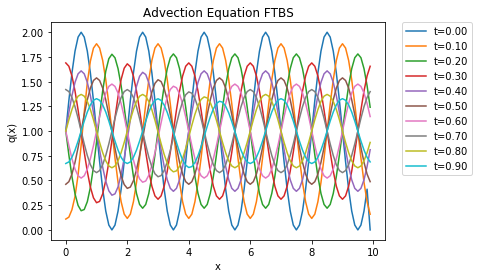

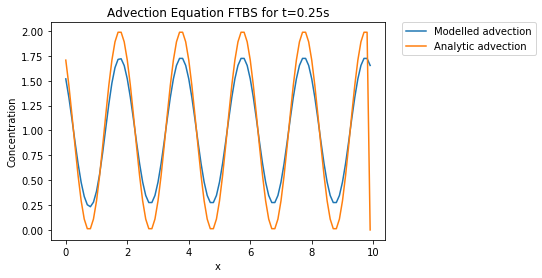

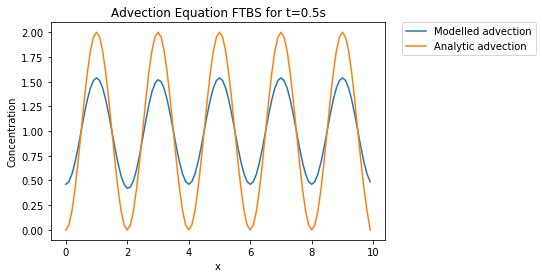

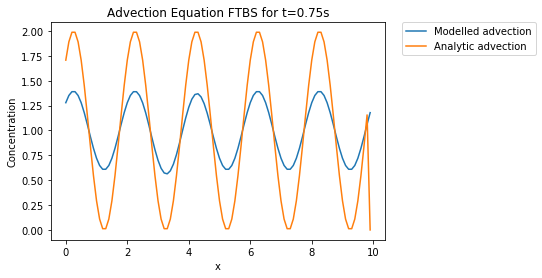

|   Time |   L1 error |   L2 error |
|--------+------------+------------|
|  0.250 |      0.187 |      0.206 |
|  0.500 |      0.291 |      0.266 |
|  0.750 |      0.401 |      0.364 |


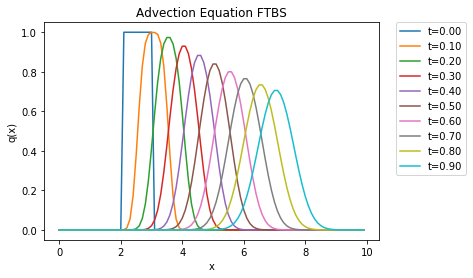

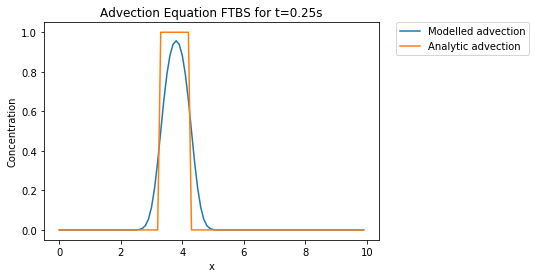

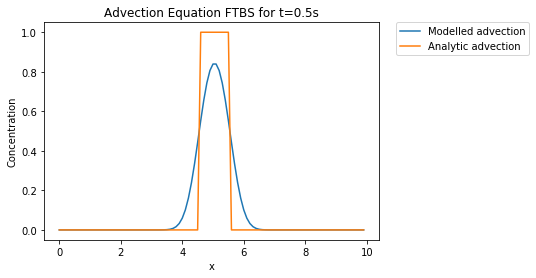

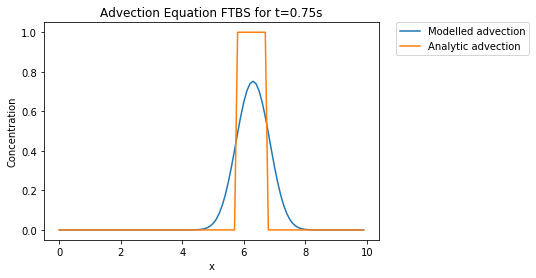

|   Time |   L1 error |   L2 error |
|--------+------------+------------|
|  0.250 |      0.403 |      0.350 |
|  0.500 |      0.561 |      0.413 |
|  0.750 |      0.687 |      0.475 |


In [145]:

    ##Import necessary modules.
import numpy as np
from numpy import sin
from tabulate import tabulate
import matplotlib.pyplot as plt
#Create function to call in initial values for q and elements for Courant number.
#n is number of data points in space, with diffx being the distance between these values.
#m is number of data points in time, with difft being the time interval between these values.
#windspeed is considered as constant in this model.
#in_cond allows the person calling the function to specify what initial data to use.
def drwFTBS(n,m,diffx,difft,windspeed,in_cond):
#Generate x values for graph.
    x=np.arange(0,diffx*(n),diffx)
#Apply the initial function to the values of x at t=0.
    initial_array=in_cond(x)
#Calculate Courant number.
    c=difft*windspeed/diffx
#Set up array of zeros to fill.
    q=np.zeros((m,n))
#Place the initial conditions in the top row of the array.
    for i in range (0,n-1):
        q[0][i]=initial_array[i]
    q=np.zeros((m,n))
#Generate data based on FTBS scheme.
    for i in range (0,n-1):
        q[0][i]=initial_array[i]
    for h in range (1,m):
        q[h][0]=q[h-1][0]-c*(q[h-1][0]-q[h-1][n-1])
        for j in range (1,n):
            q[h][j]=q[h-1][j]-c*(q[h-1][j]-q[h-1][j-1])
#Plot model.
    for w in range (0,int(m/10)):
        plt.plot(x,q[10*w],label='t='+("%.2f"%(10*w*difft)))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('q(x)')
    plt.title('Advection Equation FTBS')
    plt.show()

#Generate matrix of analytical results.
    Q=np.zeros((m,n))
    for i in range (0,n-1):
        Q[0][i]=initial_array[i]
    for h in range(1,m-1):
        for j in range(0,n-1):
            Q[h][j]=in_cond(diffx*j-windspeed*difft*h)  
#Plot graph to compare analytic and modelled results for quartile 1:
    Quartile_1=int(m/4)
    plt.plot(x,q[Quartile_1],label="Modelled advection")
    plt.plot(x,Q[Quartile_1],label="Analytic advection")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('Concentration')
    plt.title('Advection Equation FTBS for t='+str(Quartile_1*difft)+'s')
    plt.show()
#Plot graph to compare analytic and modelled results for quartile 2:
    Quartile_2=int(m/2)
    plt.plot(x,q[Quartile_2],label="Modelled advection")
    plt.plot(x,Q[Quartile_2],label="Analytic advection")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('Concentration')
    plt.title('Advection Equation FTBS for t='+str(Quartile_2*difft)+'s')
    plt.show()
#Plot graph to compare analytic and modelled results for quartile 3:
    Quartile_3=int(3*m/4)
    plt.plot(x,q[Quartile_3],label="Modelled advection")
    plt.plot(x,Q[Quartile_3],label="Analytic advection")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('Concentration')
    plt.title('Advection Equation FTBS for t='+str(Quartile_3*difft)+'s')
    plt.show()
#Set up error arrays.
    E1=np.array([abs(q[Quartile_1]-Q[Quartile_1])])
    E2=np.array([abs(q[Quartile_2]-Q[Quartile_2])])
    E3=np.array([abs(q[Quartile_3]-Q[Quartile_3])])
#Find L1 error norm using each node at these three times.
    L1_error_Q1=np.sum(E1*diffx)/np.sum(Q[Quartile_1]*diffx)
    L1_error_Q2=np.sum(E2*diffx)/np.sum(Q[Quartile_2]*diffx)
    L1_error_Q3=np.sum(E3*diffx)/np.sum(Q[Quartile_3]*diffx)
    L1_error=[(L1_error_Q1).round(3),(L1_error_Q2).round(3),(L1_error_Q3).round(3)]
#Find root mean square error at each node at these three times.
    L2_error_Q1=(np.sqrt(np.sum(E1**2*diffx)))/(np.sqrt(np.sum(Q[Quartile_1]**2*diffx)))
    L2_error_Q2=(np.sqrt(np.sum(E2**2*diffx)))/(np.sqrt(np.sum(Q[Quartile_2]**2*diffx)))
    L2_error_Q3=(np.sqrt(np.sum(E3**2*diffx)))/(np.sqrt(np.sum(Q[Quartile_3]**2*diffx)))   
    L2_error=[(L2_error_Q1),(L2_error_Q2),(L2_error_Q3)]
#Output these as a table. 
    time=[Quartile_1*difft,Quartile_2*difft,Quartile_3*difft]
    table=zip(time,L1_error,L2_error)
    print(tabulate(table, headers=["Time", "L1 error", "L2 error"],floatfmt=".3f",tablefmt='orgtbl'))
    return
drwFTBS(100,100,0.1,0.01,5,lambda x:(sin(np.pi*x)+1))
drwFTBS(100,100,0.1,0.01,5,lambda x: np.heaviside(-(x-3),1)-np.heaviside(-(x-2),1))

In [144]:
headers = ['planet', 'amp', 'mass', 'period', 'ecc']    

amp = [1.1, 1.2, 1.3, 1.4]
mass = [2.1, 2.2, 2.3, 2.4]
period = [3.1, 3.2, 3.3, 3.4]
ecc = [4.1, 4.2, 4.3, 4.4]
planet = range(1, len(amp)+1)

table = zip(planet, amp, mass, period, ecc)
print(tabulate(table, headers=headers, floatfmt=".4f"))

  planet     amp    mass    period     ecc
--------  ------  ------  --------  ------
       1  1.1000  2.1000    3.1000  4.1000
       2  1.2000  2.2000    3.2000  4.2000
       3  1.3000  2.3000    3.3000  4.3000
       4  1.4000  2.4000    3.4000  4.4000
